In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
sns.set_palette("husl")

In [9]:
print("="*80)
print("STEP 1: LOADING FRAUD DATA")
print("="*80)

# Load datasets
fraud_data = pd.read_csv('../data/raw/Fraud_Data.csv')
ip_data = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

print(f"\n✓ Fraud_Data.csv loaded: {fraud_data.shape}")
print(f"✓ IpAddress_to_Country.csv loaded: {ip_data.shape}")

# Display first few rows
print("\nFirst 5 rows of Fraud Data:")
print(fraud_data.head())

print("\nFirst 5 rows of IP Data:")
print(ip_data.head())


STEP 1: LOADING FRAUD DATA

✓ Fraud_Data.csv loaded: (151112, 11)
✓ IpAddress_to_Country.csv loaded: (138846, 3)

First 5 rows of Fraud Data:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  

First 5 rows of IP Data:
   lower_bound_

In [10]:
# ==================== 2. DATA INFO ====================
print("\n" + "="*80)
print("STEP 2: DATASET INFORMATION")
print("="*80)

print("\n--- Fraud Data Info ---")
print(fraud_data.info())

print("\n--- Data Types ---")
print(fraud_data.dtypes)

print("\n--- Memory Usage ---")
print(f"Total memory: {fraud_data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# ==================== 3. DATA QUALITY ASSESSMENT ====================
print("\n" + "="*80)
print("STEP 3: DATA QUALITY ASSESSMENT")
print("="*80)

# Missing values
print("\n1. Missing Values:")
missing = fraud_data.isnull().sum()
missing_pct = (missing / len(fraud_data)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])

if missing.sum() == 0:
    print("   ✓ No missing values found!")

# Duplicates
print("\n2. Duplicate Records:")
duplicates = fraud_data.duplicated().sum()
print(f"   Total duplicates: {duplicates}")
if duplicates > 0:
    print(f"   Percentage: {duplicates/len(fraud_data)*100:.2f}%")

# Data statistics
print("\n3. Basic Statistics:")
print(fraud_data.describe())



STEP 2: DATASET INFORMATION

--- Fraud Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None

--- Data Types ---
user_id             int64
signup_time        object
purchase_time      object
purchase_value      int64
device_id          object
source             


STEP 4: CLASS DISTRIBUTION ANALYSIS (TARGET VARIABLE)

Class Distribution:
  Legitimate (0): 136,961 (90.6354%)
  Fraud (1):      14,151 (9.3646%)

⚠️  Imbalance Ratio: 1:9.68
    → For every 1 fraudulent transaction, there are 10 legitimate ones


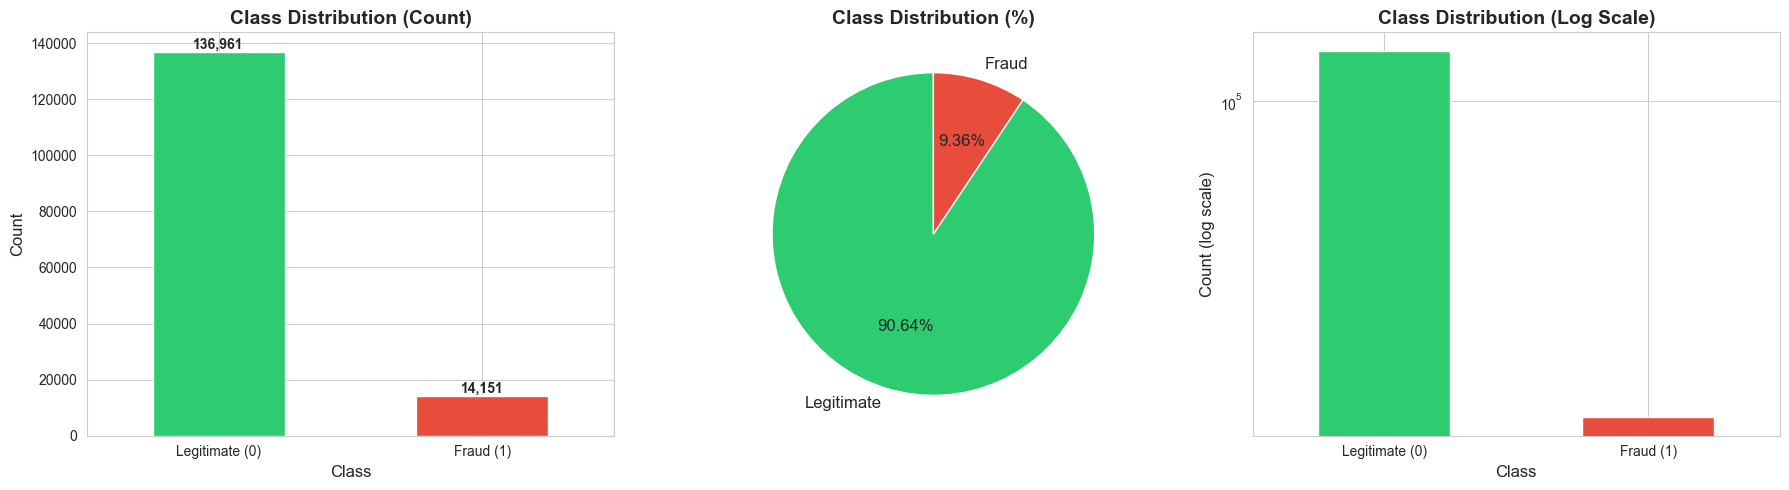

In [11]:
# ==================== 4. CLASS DISTRIBUTION ANALYSIS ====================
print("\n" + "="*80)
print("STEP 4: CLASS DISTRIBUTION ANALYSIS (TARGET VARIABLE)")
print("="*80)

# Count and percentage
class_counts = fraud_data['class'].value_counts()
class_pct = fraud_data['class'].value_counts(normalize=True) * 100

print("\nClass Distribution:")
print(f"  Legitimate (0): {class_counts[0]:,} ({class_pct[0]:.4f}%)")
print(f"  Fraud (1):      {class_counts[1]:,} ({class_pct[1]:.4f}%)")

imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\n⚠️  Imbalance Ratio: 1:{imbalance_ratio:.2f}")
print(f"    → For every 1 fraudulent transaction, there are {imbalance_ratio:.0f} legitimate ones")

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Count plot
class_counts.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Legitimate (0)', 'Fraud (1)'], rotation=0)
for i, v in enumerate(class_counts):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom', fontweight='bold')

# Pie chart
axes[1].pie(class_counts, labels=['Legitimate', 'Fraud'], autopct='%1.2f%%',
            colors=['#2ecc71', '#e74c3c'], startangle=90, textprops={'fontsize': 12})
axes[1].set_title('Class Distribution (%)', fontsize=14, fontweight='bold')

# Log scale
class_counts.plot(kind='bar', ax=axes[2], color=['#2ecc71', '#e74c3c'], logy=True)
axes[2].set_title('Class Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Class', fontsize=12)
axes[2].set_ylabel('Count (log scale)', fontsize=12)
axes[2].set_xticklabels(['Legitimate (0)', 'Fraud (1)'], rotation=0)

plt.tight_layout()
plt.savefig('fraud_class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 5: UNIVARIATE ANALYSIS

5.1 NUMERICAL VARIABLES
--------------------------------------------------------------------------------

--- Purchase Value ---
count    151112.000000
mean         36.935372
std          18.322762
min           9.000000
25%          22.000000
50%          35.000000
75%          49.000000
max         154.000000
Name: purchase_value, dtype: float64


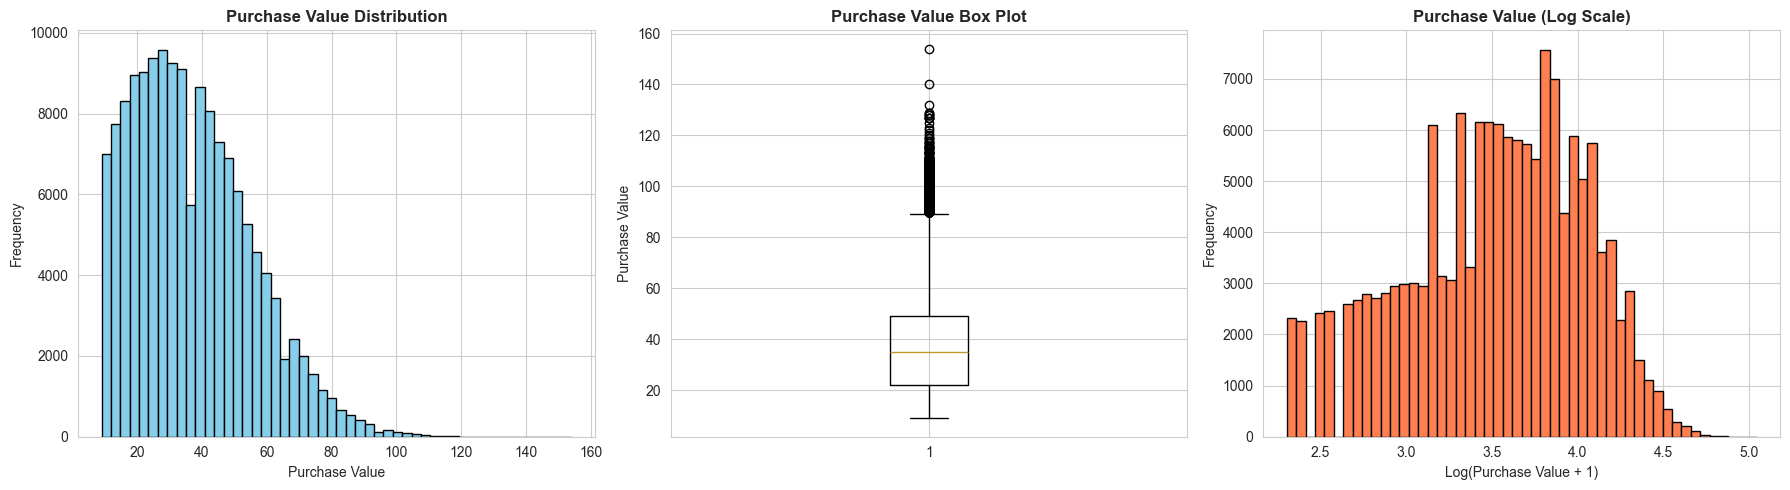


--- Age Distribution ---
count    151112.000000
mean         33.140704
std           8.617733
min          18.000000
25%          27.000000
50%          33.000000
75%          39.000000
max          76.000000
Name: age, dtype: float64


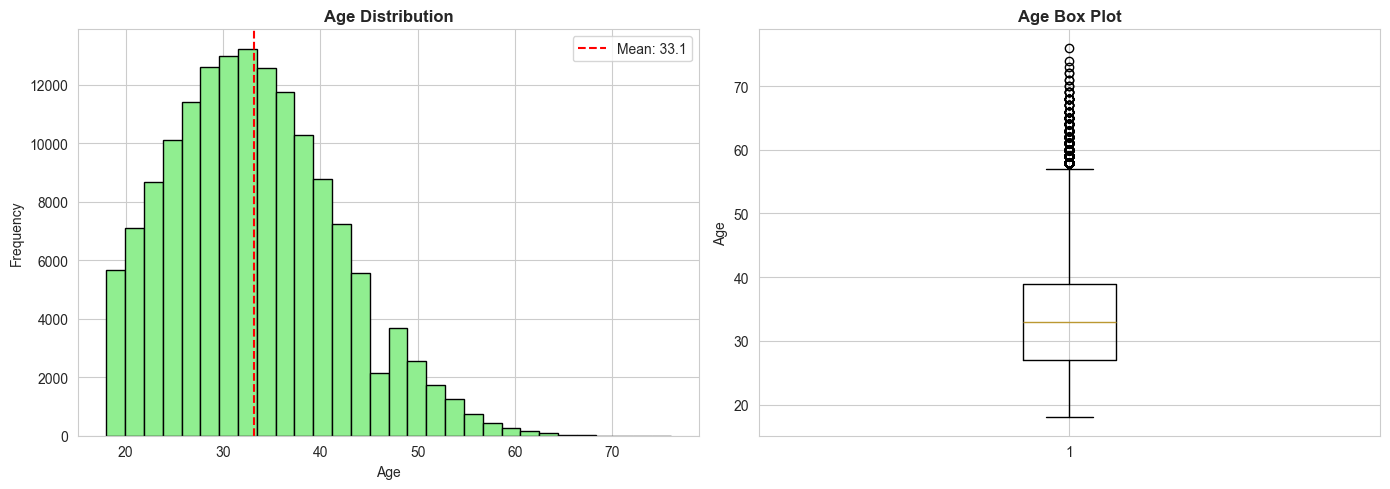

In [12]:
# ==================== 5. UNIVARIATE ANALYSIS ====================
print("\n" + "="*80)
print("STEP 5: UNIVARIATE ANALYSIS")
print("="*80)

# Convert datetime columns
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'])
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'])

# 5.1 Numerical Variables
print("\n5.1 NUMERICAL VARIABLES")
print("-" * 80)

# Purchase Value
print("\n--- Purchase Value ---")
print(fraud_data['purchase_value'].describe())

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram
axes[0].hist(fraud_data['purchase_value'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Purchase Value Distribution', fontweight='bold')
axes[0].set_xlabel('Purchase Value')
axes[0].set_ylabel('Frequency')

# Box plot
axes[1].boxplot(fraud_data['purchase_value'], vert=True)
axes[1].set_title('Purchase Value Box Plot', fontweight='bold')
axes[1].set_ylabel('Purchase Value')

# Log scale
axes[2].hist(np.log1p(fraud_data['purchase_value']), bins=50, color='coral', edgecolor='black')
axes[2].set_title('Purchase Value (Log Scale)', fontweight='bold')
axes[2].set_xlabel('Log(Purchase Value + 1)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('purchase_value_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Age
print("\n--- Age Distribution ---")
print(fraud_data['age'].describe())

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(fraud_data['age'], bins=30, color='lightgreen', edgecolor='black')
axes[0].set_title('Age Distribution', fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].axvline(fraud_data['age'].mean(), color='red', linestyle='--', label=f"Mean: {fraud_data['age'].mean():.1f}")
axes[0].legend()

axes[1].boxplot(fraud_data['age'])
axes[1].set_title('Age Box Plot', fontweight='bold')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



5.2 CATEGORICAL VARIABLES
--------------------------------------------------------------------------------

--- SOURCE ---
source
SEO       60615
Ads       59881
Direct    30616
Name: count, dtype: int64

--- BROWSER ---
browser
Chrome     61432
IE         36727
Safari     24667
FireFox    24610
Opera       3676
Name: count, dtype: int64

--- SEX ---
sex
M    88293
F    62819
Name: count, dtype: int64


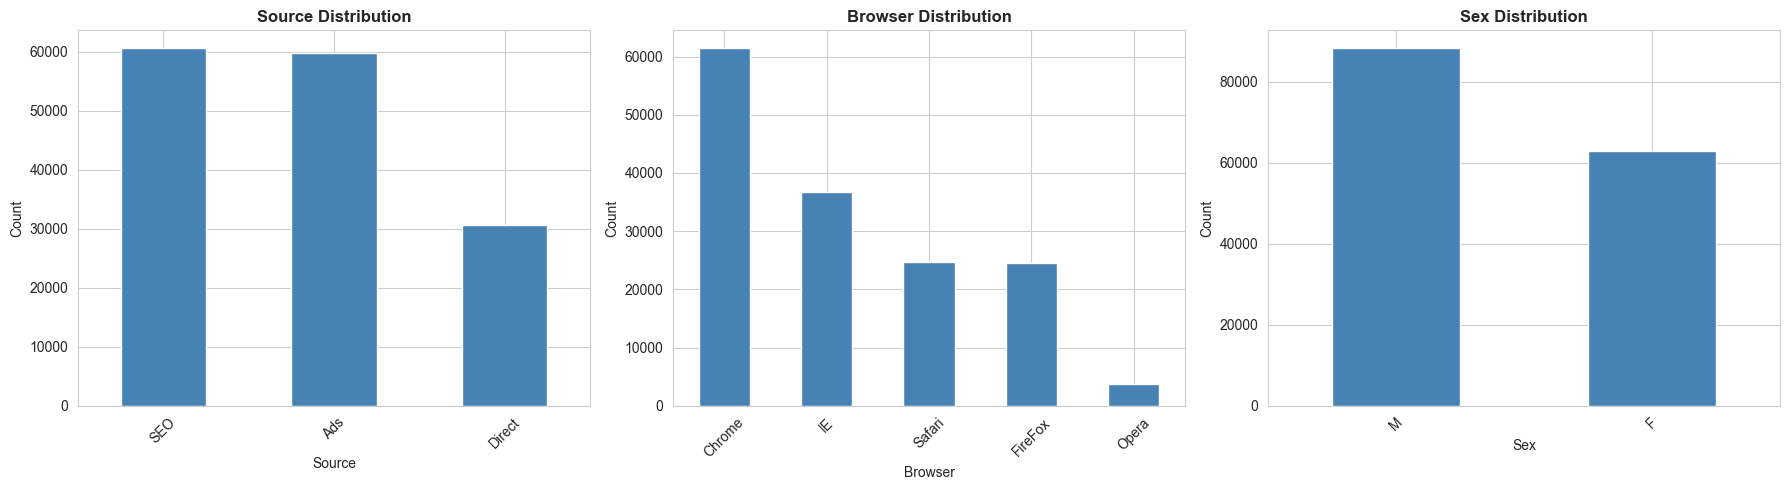

In [13]:
# 5.2 Categorical Variables
print("\n5.2 CATEGORICAL VARIABLES")
print("-" * 80)

categorical_cols = ['source', 'browser', 'sex']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    print(f"\n--- {col.upper()} ---")
    value_counts = fraud_data[col].value_counts()
    print(value_counts)
    
    value_counts.head(10).plot(kind='bar', ax=axes[idx], color='steelblue')
    axes[idx].set_title(f'{col.title()} Distribution', fontweight='bold')
    axes[idx].set_xlabel(col.title())
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 6: BIVARIATE ANALYSIS (Features vs Target)

6.1 Purchase Value vs Fraud Class
          count       mean        std  min   25%   50%   75%    max
class                                                              
0      136961.0  36.929418  18.315064  9.0  22.0  35.0  49.0  154.0
1       14151.0  36.993004  18.397654  9.0  22.0  35.0  49.0  111.0


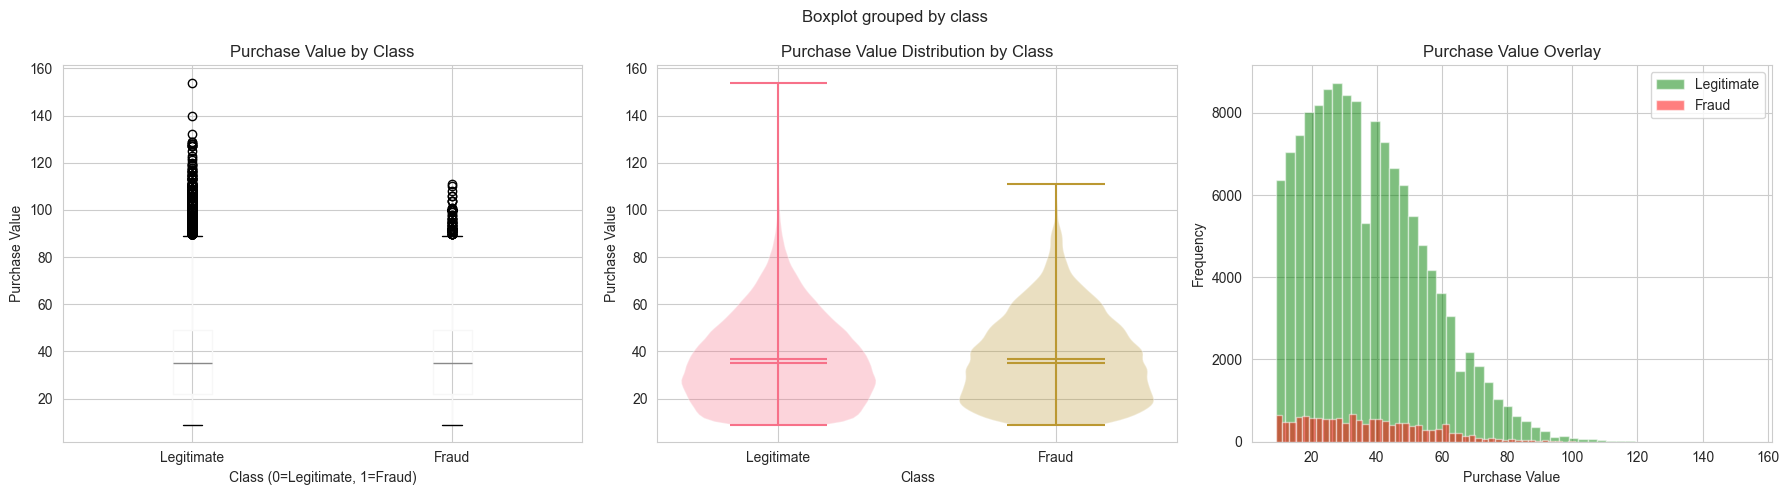

In [14]:
# ==================== 6. BIVARIATE ANALYSIS ====================
print("\n" + "="*80)
print("STEP 6: BIVARIATE ANALYSIS (Features vs Target)")
print("="*80)

# 6.1 Purchase Value vs Fraud
print("\n6.1 Purchase Value vs Fraud Class")
fraud_purchase = fraud_data.groupby('class')['purchase_value'].describe()
print(fraud_purchase)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Box plot
fraud_data.boxplot(column='purchase_value', by='class', ax=axes[0])
axes[0].set_title('Purchase Value by Class')
axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)')
axes[0].set_ylabel('Purchase Value')
plt.sca(axes[0])
plt.xticks([1, 2], ['Legitimate', 'Fraud'])

# Violin plot
for class_val in [0, 1]:
    data_subset = fraud_data[fraud_data['class'] == class_val]['purchase_value']
    axes[1].violinplot([data_subset], positions=[class_val], widths=0.7,
                       showmeans=True, showmedians=True)
axes[1].set_title('Purchase Value Distribution by Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Purchase Value')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Legitimate', 'Fraud'])

# Histogram overlay
axes[2].hist(fraud_data[fraud_data['class']==0]['purchase_value'], 
            bins=50, alpha=0.5, label='Legitimate', color='green')
axes[2].hist(fraud_data[fraud_data['class']==1]['purchase_value'], 
            bins=50, alpha=0.5, label='Fraud', color='red')
axes[2].set_title('Purchase Value Overlay')
axes[2].set_xlabel('Purchase Value')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.tight_layout()
plt.savefig('purchase_value_vs_fraud.png', dpi=300, bbox_inches='tight')
plt.show()


6.2 Age vs Fraud Class
          count       mean       std   min   25%   50%   75%   max
class                                                             
0      136961.0  33.122356  8.622678  18.0  27.0  33.0  39.0  76.0
1       14151.0  33.318281  8.568001  18.0  27.0  33.0  39.0  68.0


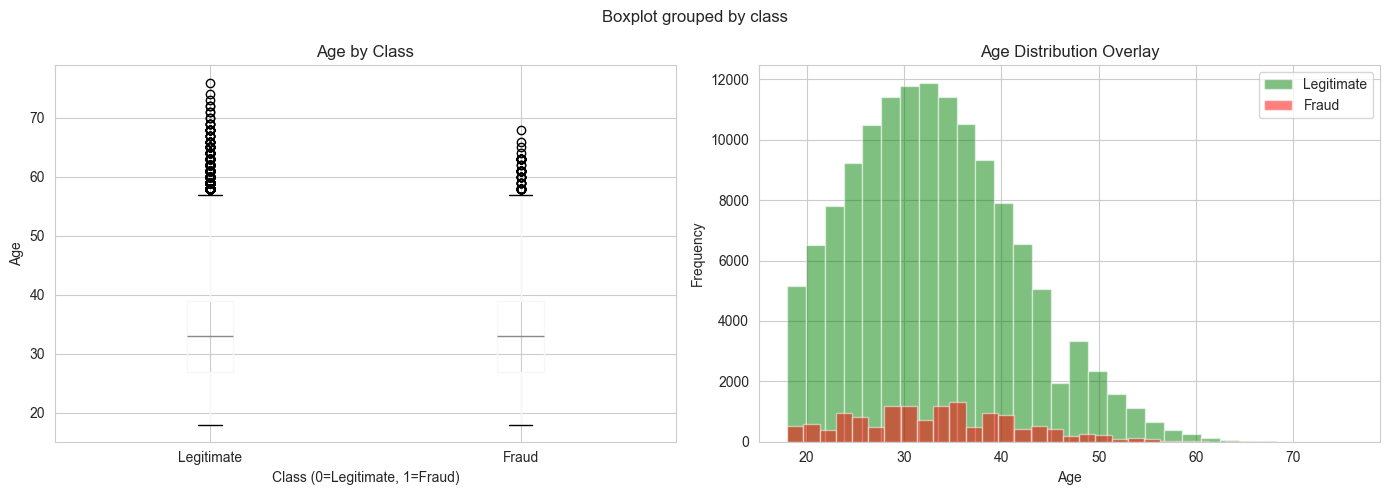

In [15]:
# 6.2 Age vs Fraud
print("\n6.2 Age vs Fraud Class")
fraud_age = fraud_data.groupby('class')['age'].describe()
print(fraud_age)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

fraud_data.boxplot(column='age', by='class', ax=axes[0])
axes[0].set_title('Age by Class')
axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)')
axes[0].set_ylabel('Age')
plt.sca(axes[0])
plt.xticks([1, 2], ['Legitimate', 'Fraud'])

axes[1].hist(fraud_data[fraud_data['class']==0]['age'], 
            bins=30, alpha=0.5, label='Legitimate', color='green')
axes[1].hist(fraud_data[fraud_data['class']==1]['age'], 
            bins=30, alpha=0.5, label='Fraud', color='red')
axes[1].set_title('Age Distribution Overlay')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.savefig('age_vs_fraud.png', dpi=300, bbox_inches='tight')
plt.show()


6.3 Categorical Variables vs Fraud

--- SOURCE vs Fraud ---
        Fraud_Count  Total  Fraud_Rate
source                                
Direct         3226  30616    0.105370
Ads            5513  59881    0.092066
SEO            5412  60615    0.089285

--- BROWSER vs Fraud ---
         Fraud_Count  Total  Fraud_Rate
browser                                
Chrome          6069  61432    0.098792
FireFox         2342  24610    0.095165
Safari          2225  24667    0.090201
Opera            328   3676    0.089227
IE              3187  36727    0.086775

--- SEX vs Fraud ---
     Fraud_Count  Total  Fraud_Rate
sex                                
M           8434  88293    0.095523
F           5717  62819    0.091007


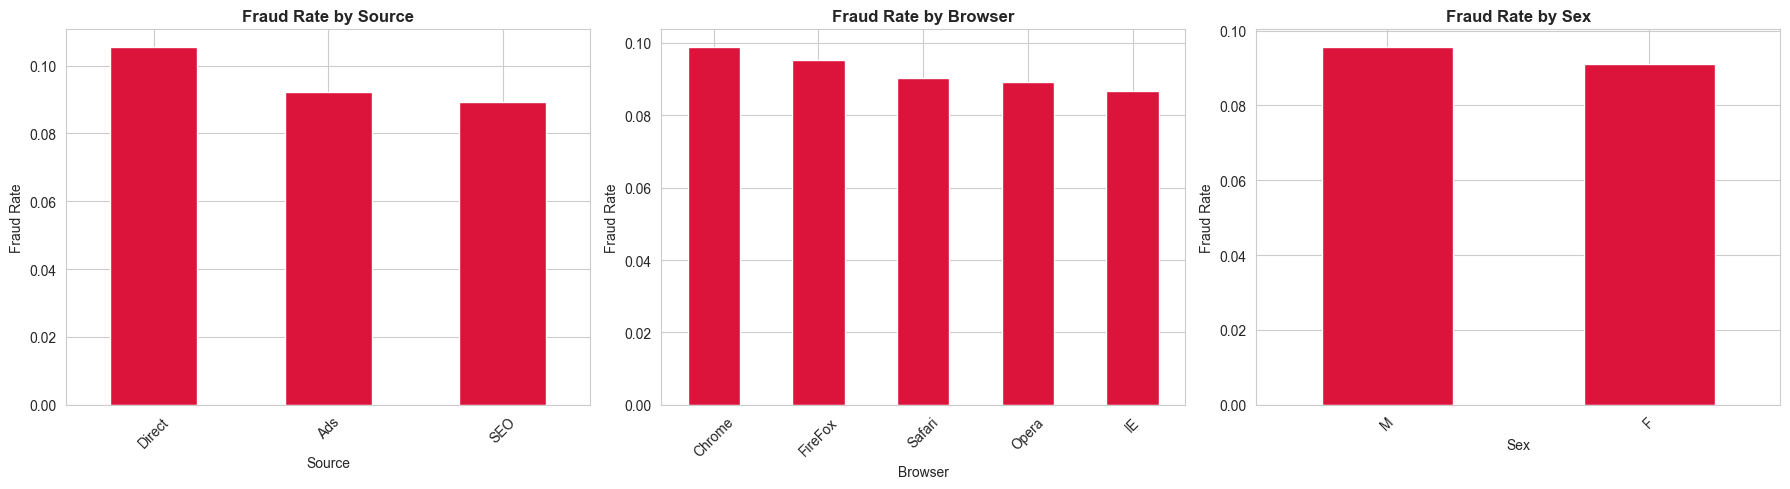

In [16]:
# 6.3 Categorical variables vs Fraud
print("\n6.3 Categorical Variables vs Fraud")

for col in categorical_cols:
    print(f"\n--- {col.upper()} vs Fraud ---")
    fraud_rate = fraud_data.groupby(col)['class'].agg(['sum', 'count', 'mean'])
    fraud_rate.columns = ['Fraud_Count', 'Total', 'Fraud_Rate']
    fraud_rate = fraud_rate.sort_values('Fraud_Rate', ascending=False)
    print(fraud_rate.head(10))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(categorical_cols):
    fraud_rate = fraud_data.groupby(col)['class'].mean().sort_values(ascending=False).head(10)
    fraud_rate.plot(kind='bar', ax=axes[idx], color='crimson')
    axes[idx].set_title(f'Fraud Rate by {col.title()}', fontweight='bold')
    axes[idx].set_xlabel(col.title())
    axes[idx].set_ylabel('Fraud Rate')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('fraud_rate_by_categorical.png', dpi=300, bbox_inches='tight')
plt.show()


STEP 7: TEMPORAL ANALYSIS

7.1 Fraud by Hour of Day
      sum  count      mean
hour                      
0     553   6186  0.089395
1     560   6228  0.089917
2     583   6338  0.091985
3     614   6458  0.095076
4     502   6050  0.082975
5     556   6189  0.089837
6     594   6380  0.093103
7     545   6181  0.088173
8     648   6387  0.101456
9     679   6418  0.105796
10    608   6100  0.099672
11    564   6327  0.089142
12    604   6403  0.094331
13    571   6292  0.090750
14    605   6355  0.095201
15    631   6369  0.099074
16    623   6309  0.098748
17    695   6466  0.107485
18    598   6252  0.095649
19    610   6299  0.096841
20    509   6221  0.081820
21    567   6224  0.091099
22    543   6358  0.085404
23    589   6322  0.093167


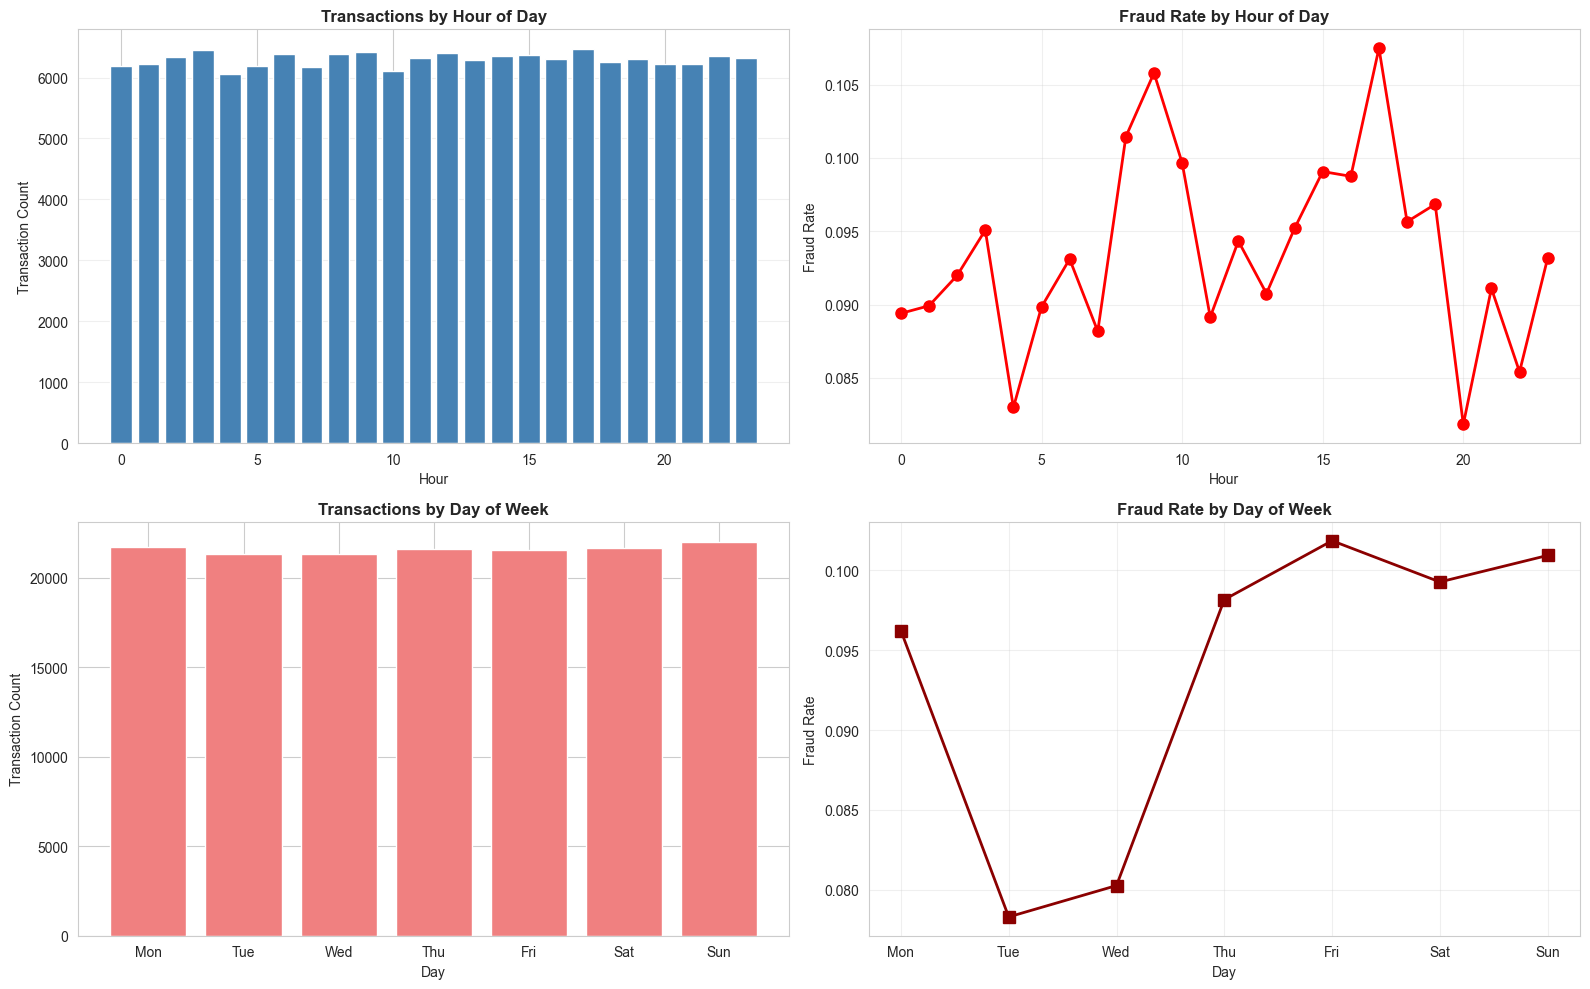

In [17]:
# ==================== 7. TEMPORAL ANALYSIS ====================
print("\n" + "="*80)
print("STEP 7: TEMPORAL ANALYSIS")
print("="*80)

# Extract time features
fraud_data['hour'] = fraud_data['purchase_time'].dt.hour
fraud_data['day_of_week'] = fraud_data['purchase_time'].dt.dayofweek
fraud_data['day_of_month'] = fraud_data['purchase_time'].dt.day

# Hour of day
print("\n7.1 Fraud by Hour of Day")
hourly_fraud = fraud_data.groupby('hour')['class'].agg(['sum', 'count', 'mean'])
print(hourly_fraud)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Transactions by hour
axes[0, 0].bar(hourly_fraud.index, hourly_fraud['count'], color='steelblue')
axes[0, 0].set_title('Transactions by Hour of Day', fontweight='bold')
axes[0, 0].set_xlabel('Hour')
axes[0, 0].set_ylabel('Transaction Count')
axes[0, 0].grid(axis='y', alpha=0.3)

# Fraud rate by hour
axes[0, 1].plot(hourly_fraud.index, hourly_fraud['mean'], marker='o', 
                linewidth=2, markersize=8, color='red')
axes[0, 1].set_title('Fraud Rate by Hour of Day', fontweight='bold')
axes[0, 1].set_xlabel('Hour')
axes[0, 1].set_ylabel('Fraud Rate')
axes[0, 1].grid(alpha=0.3)

# Day of week
weekly_fraud = fraud_data.groupby('day_of_week')['class'].agg(['sum', 'count', 'mean'])
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

axes[1, 0].bar(range(7), weekly_fraud['count'], color='lightcoral')
axes[1, 0].set_title('Transactions by Day of Week', fontweight='bold')
axes[1, 0].set_xlabel('Day')
axes[1, 0].set_ylabel('Transaction Count')
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(days)

axes[1, 1].plot(range(7), weekly_fraud['mean'], marker='s', 
                linewidth=2, markersize=8, color='darkred')
axes[1, 1].set_title('Fraud Rate by Day of Week', fontweight='bold')
axes[1, 1].set_xlabel('Day')
axes[1, 1].set_ylabel('Fraud Rate')
axes[1, 1].set_xticks(range(7))
axes[1, 1].set_xticklabels(days)
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 8: CORRELATION ANALYSIS

Correlation Matrix:
                purchase_value       age     class
purchase_value        1.000000  0.002370  0.001011
age                   0.002370  1.000000  0.006624
class                 0.001011  0.006624  1.000000


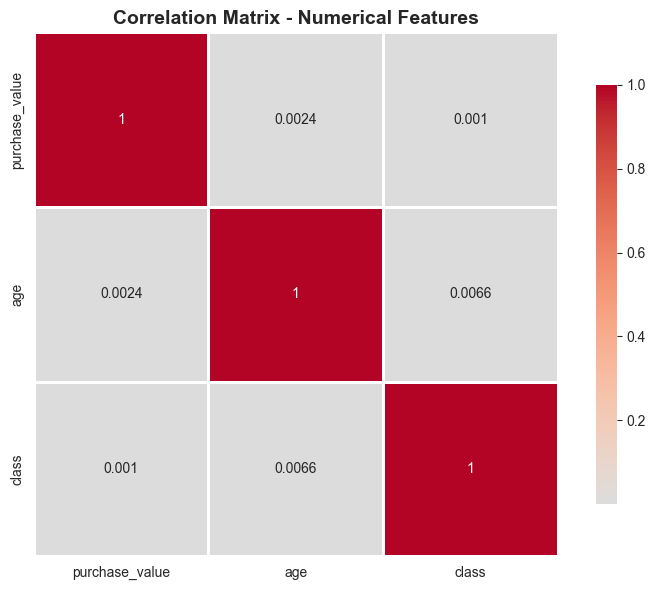

In [18]:
# ==================== 8. CORRELATION ANALYSIS ====================
print("\n" + "="*80)
print("STEP 8: CORRELATION ANALYSIS")
print("="*80)

# Select numerical columns
numerical_cols = ['purchase_value', 'age', 'class']
correlation_matrix = fraud_data[numerical_cols].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()